In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = "customer_booking (1).csv"

In [7]:
import chardet

with open(r'C:\Users\hiran\British Airways Virtual Internship\customer_booking (1).csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [8]:
df = pd.read_csv(data, encoding='ISO-8859-1')

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [11]:
df.shape

(50000, 14)

In [12]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [14]:
x= df.drop('booking_complete', axis=1)
y= df.booking_complete

for colname in x.select_dtypes(include='object'):
    x[colname], _ = x[colname].factorize()

In [15]:
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [16]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.053414
booking_origin           0.047234
flight_duration          0.016034
wants_extra_baggage      0.009237
length_of_stay           0.007730
num_passengers           0.006759
wants_in_flight_meals    0.004906
trip_type                0.003334
wants_preferred_seat     0.003136
flight_day               0.001951
flight_hour              0.000195
sales_channel            0.000000
purchase_lead            0.000000
Name: MI Scores, dtype: float64

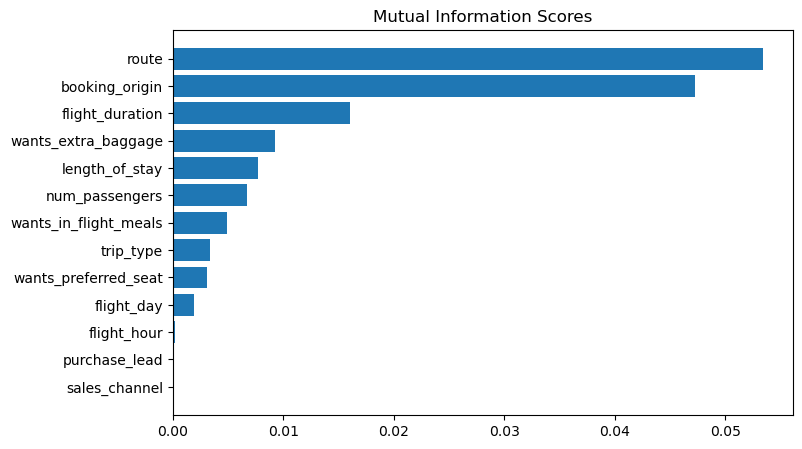

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [18]:

# sns.jointplot(data=df, x='route', y='actual_column_name')


In [22]:
from sklearn.model_selection import train_test_split

def dataset(x, y):
    train_full_x, val_x, train_full_y, val_y = train_test_split(x, y, test_size=0.2, random_state=0)
    
    train_x, test_x, train_y, test_y = train_test_split(train_full_x, train_full_y, test_size=0.25,random_state = 0)
    return (train_x, val_x, train_y, val_y)
    

In [23]:
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return x

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'num_passengers']
x = df[features]

x = pd.get_dummies(x, columns=features)
x = scale(x)
y = df.booking_complete

x_train, x_val, y_train, y_val = dataset(x, y)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_val)

print('Accuracy:', accuracy_score(y_val, preds)*100)
print('AUC score:', roc_auc_score(y_val, preds))

Accuracy: 83.36
AUC score: 0.5657818407546988


In [25]:
x = df.drop('booking_complete', axis=1)
x = pd.get_dummies(x)
x = scale(x)
y = df.booking_complete

x_train, x_val, y_train, y_val = dataset(x, y)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_val)

print('Accuracy:', accuracy_score(y_val, preds)*100)
print('AUC score:', roc_auc_score(y_val, preds))


Accuracy: 84.76
AUC score: 0.5479604084813514


In [29]:
# %pip install xgboost
from xgboost import XGBClassifier

x = df[features]

x = pd.get_dummies(x, columns=features)
x = scale(x)

y = df.booking_complete

x_train, x_val, y_train, y_val = dataset(x, y)
xgb_model = XGBClassifier()

xgb_model.fit(x_train, y_train)
prediction_xgb = xgb_model.predict(x_val)
print('Accuracy:', accuracy_score(y_val, prediction_xgb)*100)
print('AUC score:', roc_auc_score(y_val, prediction_xgb))

Accuracy: 84.72
AUC score: 0.5189398567740671


In [30]:
x = df.drop('booking_complete', axis=1)
x = pd.get_dummies(x)
x = scale(x)
y = df.booking_complete

x_train, x_val, y_train, y_val = dataset(x, y)

xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
prediction_xgb = xgb_model.predict(x_val)
print('Accuracy:', accuracy_score(y_val, prediction_xgb)*100)
print('AUC score:', roc_auc_score(y_val, prediction_xgb))

Accuracy: 84.98
AUC score: 0.5424676175552812


In [31]:
x = df.drop('booking_complete', axis=1)
x = pd.get_dummies(x)
x = scale(x)
y = df.booking_complete

train_full_x, test_x, train_full_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(train_full_x, train_full_y)
preds = forest_model.predict(test_x)

print('Accuracy:', accuracy_score(test_y, preds)*100)
print('AUC score:', roc_auc_score(test_y, preds))

Accuracy: 85.09
AUC score: 0.5577796717361984
